In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [177]:
plt.style.use('seaborn') # seaborn 스타일로 변환
sns.set(rc={'figure.figsize' : (15,7)})
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)
warnings.filterwarnings('ignore')

# 0. 대회 설명

 - 대회 : https://www.kaggle.com/c/trainanic/data
 - 주제 : predicts which passengers survived the trainanic shipwreck
 - 문제 정의 : 어떤 특징의 승객이 살아남을 확률이 높을 것인가

# 1. 데이터 불러오기

In [18]:
!kaggle competrainions download -c trainanic -p ../../W01

  0%|                                               | 0.00/34.1k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 34.1k/34.1k [00:00<00:00, 23.6MB/s]


In [19]:
import zipfile

In [20]:
zip = zipfile.ZipFile(os.path.join('..', '..', 'W01', 'trainanic.zip'))

In [34]:
zip.extractall(path = '../../W01')

In [371]:
train = pd.read_csv(os.path.join('..', '..', 'W01', 'train.csv'))
test = pd.read_csv(os.path.join('..', '..', 'W01', 'test.csv'))

In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [38]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

# 2. EDA

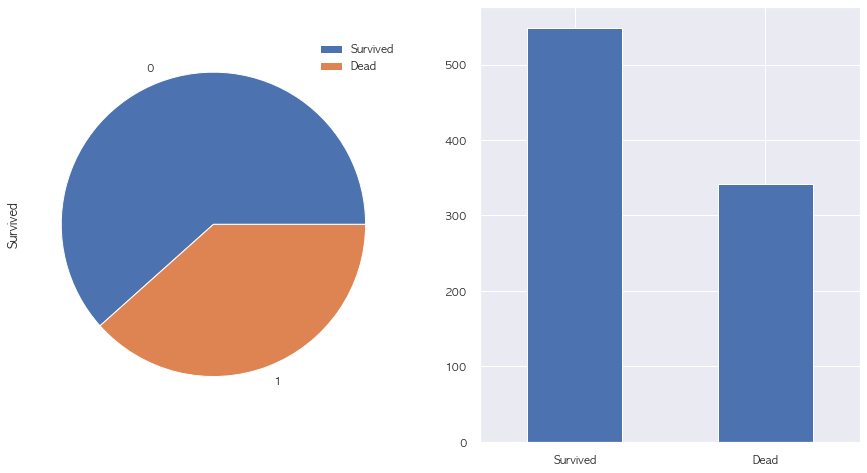

In [39]:
# 생존 / 사망 비율
f, ax = plt.subplots(1, 2, figsize=(15,8))
train['Survived'].value_counts().plot.pie(rot = 0, ax = ax[0])
ax[0].legend(['Survived', 'Dead'])
train['Survived'].value_counts().plot.bar(rot = 0, ax = ax[1])
ax[1].set_xticklabels(labels = ['Survived', 'Dead'])
plt.show()

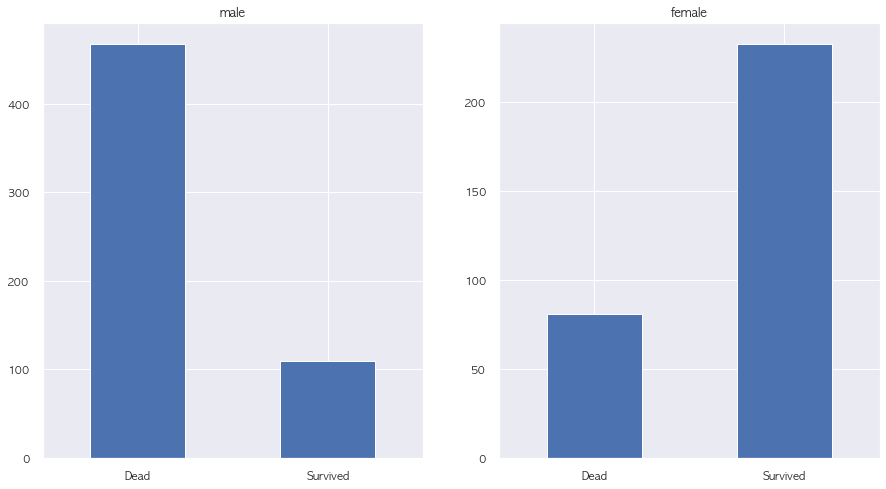

In [104]:
# 성별별 사망 비율
f, ax = plt.subplots(1, 2, figsize=(15,8))
train.loc[train['Sex'] == 'male', 'Survived'].value_counts().sort_index().plot.bar(rot = 0, ax = ax[0])
ax[0].set_title('male')
ax[0].set_xticklabels(['Dead', 'Survived'])
train.loc[train['Sex'] == 'female', 'Survived'].value_counts().sort_index().plot.bar(rot = 0, ax = ax[1])
ax[1].set_title('female')
ax[1].set_xticklabels(['Dead', 'Survived'])
plt.show()

In [42]:
# P_class 별 생존여부
pd.pivot_table(train, index = 'Pclass', columns = 'Survived', values = 'Name', aggfunc='count', fill_value=0)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [321]:
pd.crosstab(train['Pclass'], train['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


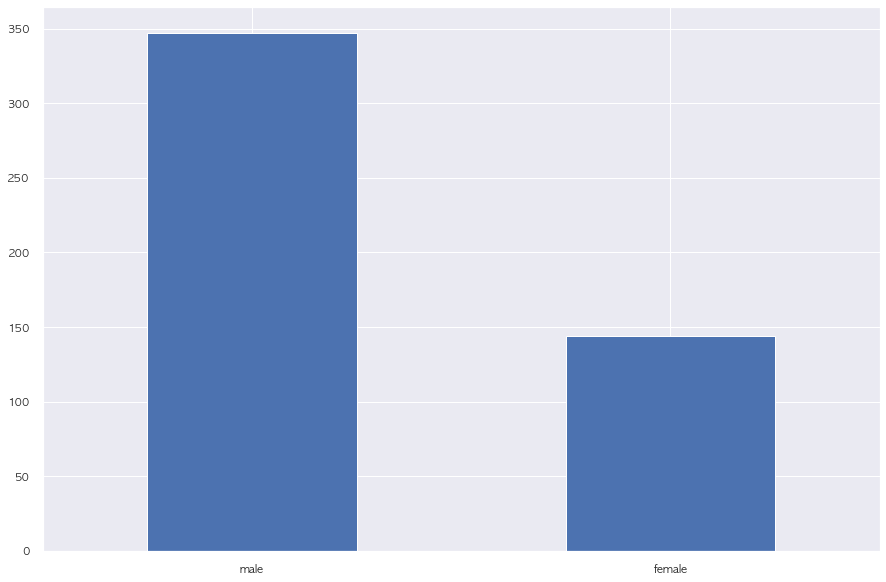

In [164]:
# Pclass가 3인 경우, 생존한 인원이 굉장히 많음
# 보통 Pclasss는 남성인 경우가 많음
train.loc[train['Pclass'] == 3, 'Sex'].value_counts().plot.bar(rot = 0)

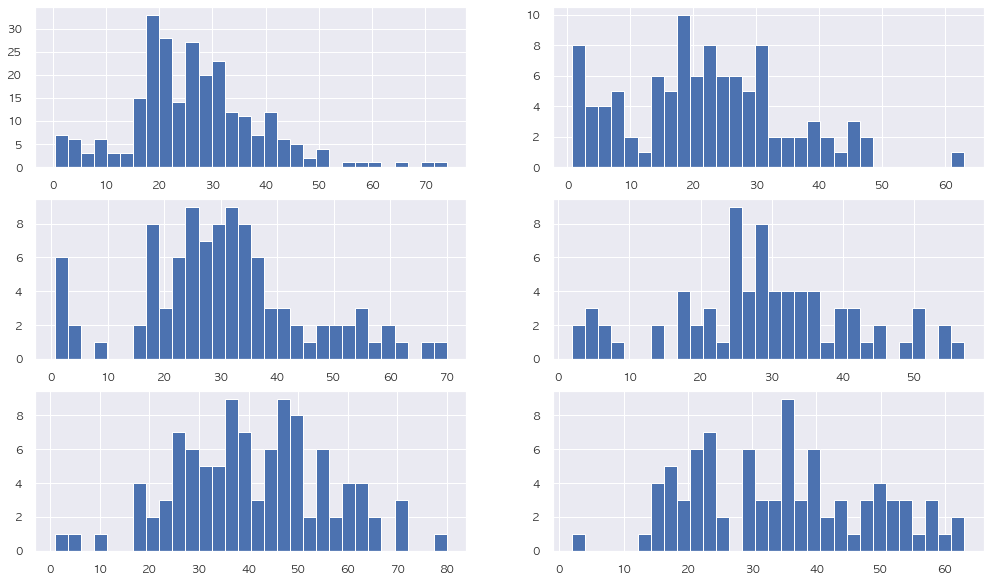

In [186]:
# Pclass별 성별별 나이 분포도
f, ax = plt.subplots(3,2, figsize = (17, 10))
train.loc[(train['Pclass'] == 3) & (train['Sex'] == 'male'), 'Age'].hist(bins = 30, ax = ax[0][0])
train.loc[(train['Pclass'] == 3) & (train['Sex'] == 'female'), 'Age'].hist(bins = 30, ax = ax[0][1])

train.loc[(train['Pclass'] == 2) & (train['Sex'] == 'male'), 'Age'].hist(bins = 30, ax = ax[1][0])
train.loc[(train['Pclass'] == 2) & (train['Sex'] == 'female'), 'Age'].hist(bins = 30, ax = ax[1][1])

train.loc[(train['Pclass'] == 1) & (train['Sex'] == 'male'), 'Age'].hist(bins = 30, ax = ax[2][0])
train.loc[(train['Pclass'] == 1) & (train['Sex'] == 'female'), 'Age'].hist(bins = 30, ax = ax[2][1])

plt.show()

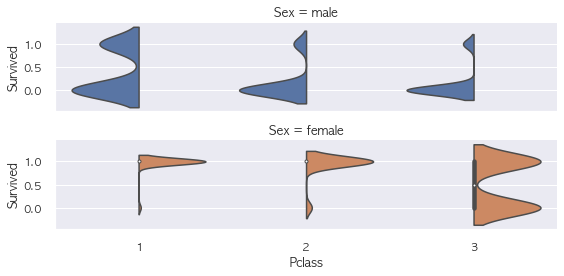

In [43]:
sns.catplot(x="Pclass", y="Survived", hue="Sex", row="Sex", data=train,
            kind="violin", split=True, height=2, aspect=4)
plt.show()

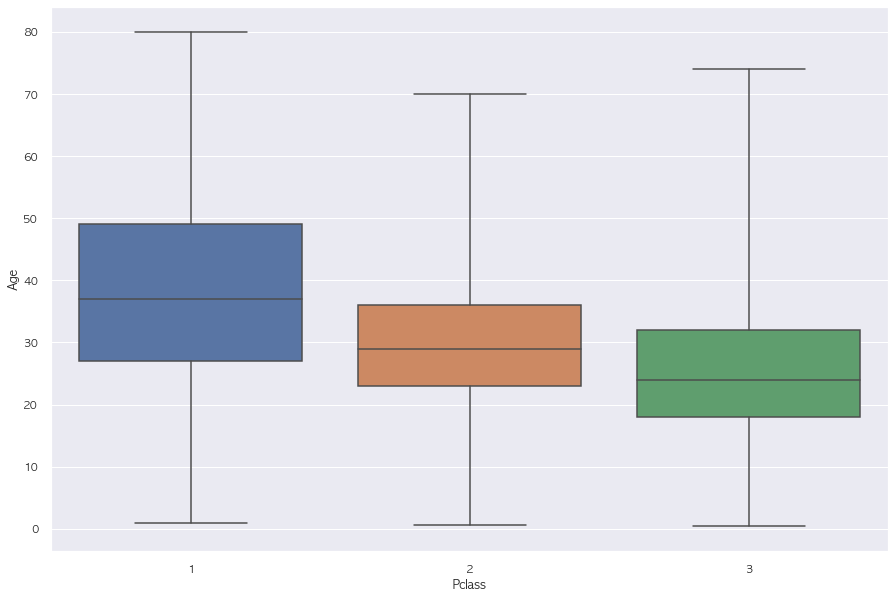

In [44]:
sns.boxplot(x="Pclass", y="Age", data=train, whis=np.inf)
plt.show()

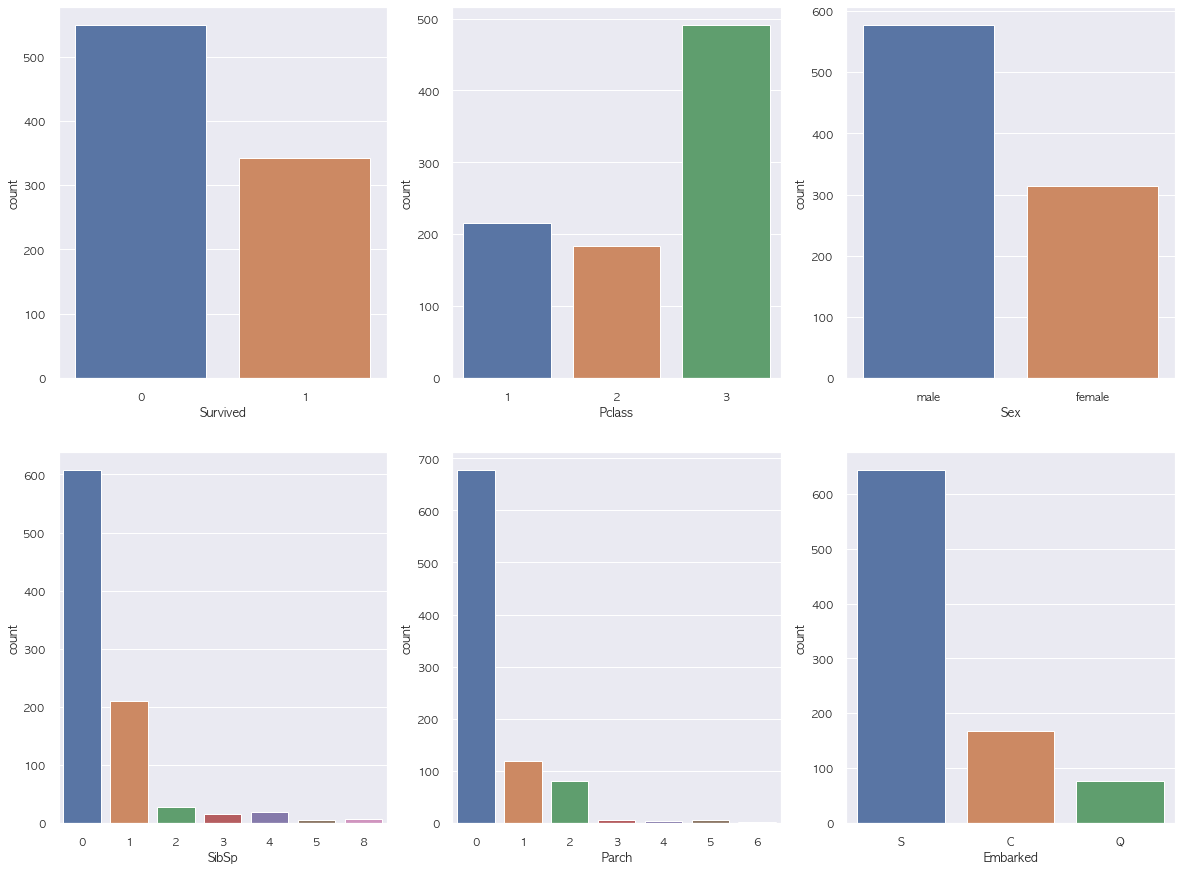

In [122]:
f, ax = plt.subplots(2,3, figsize = (20, 15))
columns = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
q = 0

for i in range(2):
    for j in range(3):
        fig = sns.countplot(x = train[columns[q]], ax = ax[i][j])
        q += 1

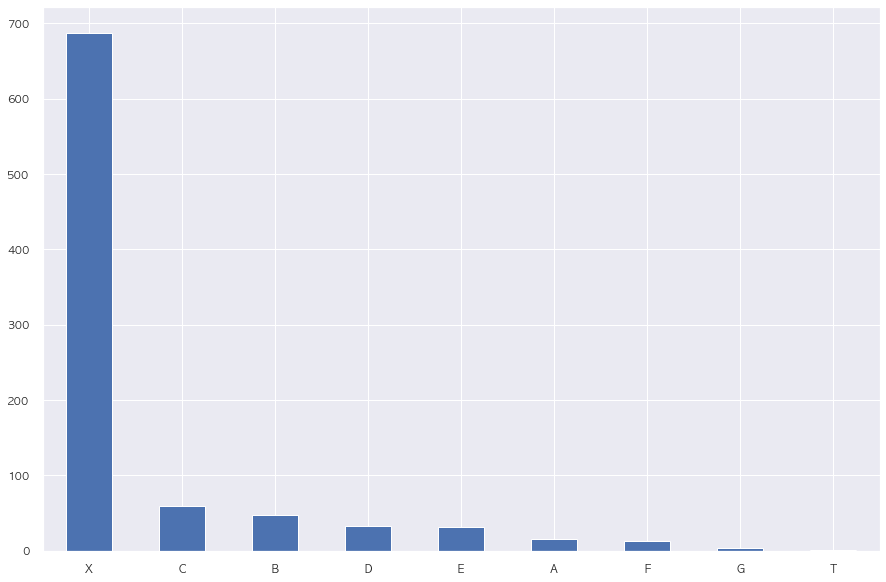

In [138]:
train['Cabin'].fillna('X').apply(lambda x : x[:1]).value_counts().plot.bar(rot = 0)

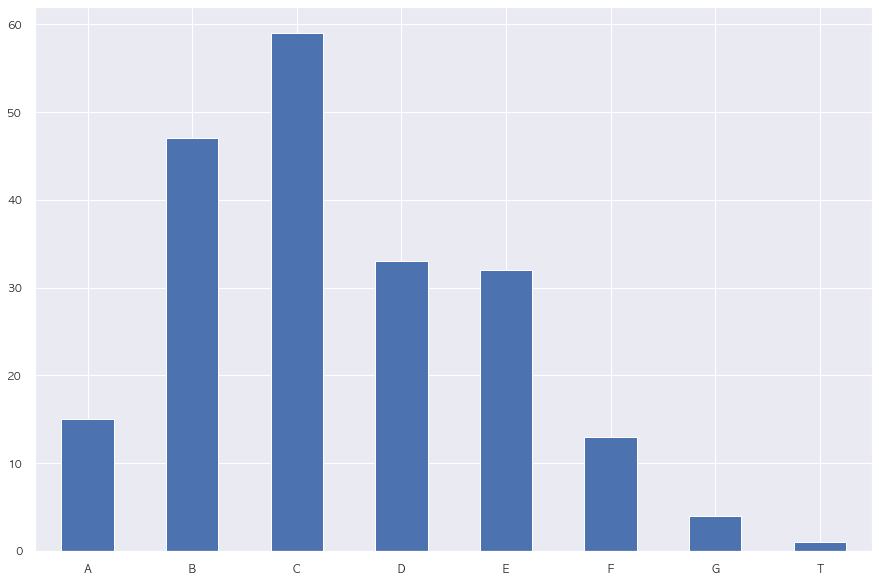

In [142]:
data = []
train.loc[train['Cabin'].notnull(), 'Cabin'].apply(lambda x : data.extend(x[:1]))
pd.Series(data).value_counts().sort_index().plot.bar(rot = 0)
plt.show()

In [217]:
train['Cabin'] = train['Cabin'].fillna('X').apply(lambda x : x[:1])

In [223]:
pd.pivot_table(train, index = 'Survived', columns = 'Cabin', values = 'Age', aggfunc = np.mean)

Cabin,A,B,C,D,E,F,G,T,X
Survived,,,,,,,,,
0,46.600000,45.181818,38.547619,40.625000,52.250000,30.625000,15.5,45.0,28.858516
1,43.571429,31.647059,34.364000,38.478261,32.977273,13.857143,14.0,NaN,24.680303


In [224]:
pd.pivot_table(train, index = 'Survived', columns = 'Cabin', values = 'Age', aggfunc = 'count')

Cabin,A,B,C,D,E,F,G,T,X
Survived,,,,,,,,,
0,5.0,11.0,21.0,8.0,8.0,4.0,2.0,1.0,364.0
1,7.0,34.0,30.0,23.0,22.0,7.0,2.0,NaN,165.0


# 3. 전처리

In [145]:
from sklearn.base import BaseEstimator, TransformerMixin

In [143]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [199]:
temp = pd.pivot_table(train, index = 'Pclass', columns = 'Sex', values = 'Age', aggfunc = np.median)

In [269]:
class preprocessing(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        # 나이 null값 채우기
        temp = pd.pivot_table(X, index = 'Pclass', columns = 'Sex', values = 'Age', aggfunc = np.median)
        
        for pclass, sex in X.loc[X['Age'].isnull(), ['Pclass', 'Sex']].drop_duplicates().values:
            X.loc[(X['Age'].isnull()) & (X['Pclass'] == pclass) & X['Sex'] == sex, 'Age'] = temp.loc[pclass][sex]
        
        # 나이 그룹 피처 생성
        X['Agegroup'] = X['Age'].apply(lambda x : 'baby' if (x > 0) & (x < 5) else (
            'Child' if (x > 5) & (x <= 12) else(
            'Teenager' if (x > 12) & (x <= 18) else(
            'Student' if (x > 18) & (x <= 24) else(
            'Young Adult' if (x > 24) & (x <= 35) else(
            'Adult' if (x > 35) & (x <= 60) else(
            'Senior' if x > 60 else 'Unknown'
            )))))))
        
        # cabin 피쳐 전처리
        X['Cabin'] = X['Cabin'].fillna('X').apply(lambda x : x[:1])
        
        # 티켓 글자 포함 여부
        X['Ticket'] = X['Ticket'].apply(lambda x : 1 if x.isalnum() else 0)
        
        # Fare qcut
        X['Fare_qcut'] = pd.qcut(X['Fare'], 5, labels = False)
        
        # Fare level
        X['Fare'] = X['Fare'].apply(lambda x : 0 if x <= 10 else 
                                    (1 if (x > 10) & (x <= 30) else
                                     (2 if (x > 30) & (x <= 100) else 3
                                    )))
                                   
        namedict = {
            'Dona' : 0,
            'Don':0,
            'Rev':0,
            'Capt':0,
            'Jonkheer':0,
            'Mr':1,
            'Dr':2,
            'Major':3,
            'Col':3,
            'Master':4,
            'Miss':5,
            'Mrs':6,
            'Mme':7,
            'Ms':7,
            'Lady':7,
            'Sir':7,
            'Mlle':7,
            'the Countess':7 
        }
        X['Name'] = X['Name'].apply(lambda x : namedict[x.split(',')[1].split('.')[0].strip()])
        
        return X

In [270]:
preprocessing = preprocessing()

In [277]:
X = preprocessing.fit_transform(train)

In [ ]:
y = X['Survived']
X = pd.get_dummies(X.iloc[:, 2:])

In [286]:
X

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Fare_qcut,Sex_female,Sex_male,...,Embarked_Q,Embarked_S,Agegroup_Adult,Agegroup_Child,Agegroup_Senior,Agegroup_Student,Agegroup_Teenager,Agegroup_Unknown,Agegroup_Young Adult,Agegroup_baby
0,3,1,22.0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
1,1,6,38.0,1,0,0,2,4,1,0,...,0,0,1,0,0,0,0,0,0,0
2,3,5,26.0,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,1,0
3,1,6,35.0,1,0,1,2,4,1,0,...,0,1,0,0,0,0,0,0,1,0
4,3,1,35.0,0,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,1,1,2,0,1,...,0,1,0,0,0,0,0,0,1,0
887,1,5,19.0,0,0,1,1,3,1,0,...,0,1,0,0,0,1,0,0,0,0
888,3,5,NaN,1,2,0,1,3,1,0,...,0,1,0,0,0,0,0,1,0,0
889,1,1,26.0,0,0,1,1,3,0,1,...,0,0,0,0,0,0,0,0,1,0


# 4. 모델 구현

In [288]:
import xgboost
from sklearn.model_selection import KFold

In [349]:
xgb_pars = {'min_child_weight': 1, 'eta': 0.5, 'colsample_bytree': 0.9, 
            'max_depth': 6,
'subsample': 0.9, 'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,
'eval_metric': 'auc', 'objective': 'reg:linear'}

In [353]:
cv = KFold(5, shuffle = True, random_state = 99)

for idx_train, idx_valid in cv.split(X):
    x_train = X.loc[idx_train]
    y_train = y.loc[idx_train]
    x_valid = X.loc[idx_valid]
    y_valid = y.loc[idx_valid]
    
#     model = xgboost.XGBClassifier()
    
    dtrain = xgboost.DMatrix(x_train, label=y_train)
    dvalid = xgboost.DMatrix(x_valid, label=y_valid)
    
    watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
    model = xgboost.train(xgb_pars, dtrain, 10000, watchlist, early_stopping_rounds=100, verbose_eval=10)
    
#     model.fit(x_train, y_train)
#     score = model.score(x_valid, y_valid)

[0]	train-auc:0.927569	valid-auc:0.846205
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 100 rounds.
[10]	train-auc:0.98746	valid-auc:0.872486
[20]	train-auc:0.994312	valid-auc:0.872084
[30]	train-auc:0.996589	valid-auc:0.872888
[40]	train-auc:0.997428	valid-auc:0.872084
[50]	train-auc:0.997819	valid-auc:0.875168
[60]	train-auc:0.997976	valid-auc:0.87195
[70]	train-auc:0.998309	valid-auc:0.870877
[80]	train-auc:0.99845	valid-auc:0.868061
[90]	train-auc:0.998459	valid-auc:0.86605
[100]	train-auc:0.998317	valid-auc:0.866988
Stopping. Best iteration:
[9]	train-auc:0.983338	valid-auc:0.877246

[0]	train-auc:0.928105	valid-auc:0.795292
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 100 rounds.
[10]	train-auc:0.98572	valid-auc:0.77995
[20]	train-auc:0.993978	valid-auc:0.766499
[30]	train-auc:0.996495	valid-auc:0.759913
[40]	

In [355]:
cv = KFold(5, shuffle = True, random_state = 99)

In [357]:
for i, (idx_train, idx_valid) in enumerate(cv.split(X)):
    x_train = X.loc[idx_train]
    y_train = y.loc[idx_train]
    x_valid = X.loc[idx_valid]
    y_valid = y.loc[idx_valid]
    
#     model = xgboost.XGBClassifier()
    
    dtrain = xgboost.DMatrix(x_train, label=y_train)
    dvalid = xgboost.DMatrix(x_valid, label=y_valid)
    
    watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
    model = xgboost.train(xgb_pars, dtrain, 10000, watchlist, early_stopping_rounds=100, verbose_eval=10)
    
    if i == 2:
        break
    
#     model.fit(x_train, y_train)
#     score = model.score(x_valid, y_valid)

[0]	train-auc:0.927569	valid-auc:0.846205
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 100 rounds.
[10]	train-auc:0.98746	valid-auc:0.872486
[20]	train-auc:0.994312	valid-auc:0.872084
[30]	train-auc:0.996589	valid-auc:0.872888
[40]	train-auc:0.997428	valid-auc:0.872084
[50]	train-auc:0.997819	valid-auc:0.875168
[60]	train-auc:0.997976	valid-auc:0.87195
[70]	train-auc:0.998309	valid-auc:0.870877
[80]	train-auc:0.99845	valid-auc:0.868061
[90]	train-auc:0.998459	valid-auc:0.86605
[100]	train-auc:0.998317	valid-auc:0.866988
Stopping. Best iteration:
[9]	train-auc:0.983338	valid-auc:0.877246

[0]	train-auc:0.928105	valid-auc:0.795292
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 100 rounds.
[10]	train-auc:0.98572	valid-auc:0.77995
[20]	train-auc:0.993978	valid-auc:0.766499
[30]	train-auc:0.996495	valid-auc:0.759913
[40]	

In [370]:
X.columns

Index(['Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Fare_qcut', 'Sex_female', 'Sex_male', 'Cabin_A', 'Cabin_B', 'Cabin_C',
       'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_X',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Agegroup_Adult',
       'Agegroup_Child', 'Agegroup_Senior', 'Agegroup_Student',
       'Agegroup_Teenager', 'Agegroup_Unknown', 'Agegroup_Young Adult',
       'Agegroup_baby'],
      dtype='object')

In [372]:
X_test = preprocessing.transform(test)

In [373]:
X_test = pd.get_dummies(X_test.iloc[:, 1:])

In [393]:
X_test = X_test[X.columns]

In [394]:
dtest = xgboost.DMatrix(X_test)
pred = model.predict(dtest)

In [398]:
xgb_pred = list(map(lambda x : 1 if x > 0.5 else 0, pred))

In [415]:
sub = pd.read_csv(os.path.join('..', '..', 'W01', 'gender_submission.csv'))

In [416]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [419]:
sub['Survived'] = xgb_pred

In [421]:
sub.to_csv(os.path.join('..', '..', 'W01', 'submission_1.csv'), index = False)